## Part 0. Data Preparation

To complete the assignment you will download the Caltech Bird dataset and devise an appropriate training set split. <b>You are free to sample from the dataset to reduce the overal training samples depending on your access to compute.</b> Again, the overall accuracy is less important than your  observations and comparisons.

Dataset: <a href="http://www.vision.caltech.edu/visipedia/CUB-200-2011.html">Caltech-UCSD Birds-200-2011</a> (Also posed on Brightspace)

The dataset contains annotations for various tasks. In this assignment you will use the categories for classification (species labels)

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Create your splits for your dataset (there is a split provided for the full dataset) </li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [1]:
# pip install opencv-python-headless
# pip install opencv-contrib-python


In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
from livelossplot import PlotLossesKeras
import pandas as pd
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import os
import sys
import random
import math
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout,BatchNormalization,Activation


c:\Users\mm\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:37: UserWarning: You are currently using a nightly version of TensorFlow (2.11.0-dev20221008). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  warnings.warn(


In [2]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
PATH = Path('C:/Users/mm/Desktop/Computer Vision Final Project/CUB_200_2011/CUB_200_2011')

In [5]:
datasetfolder = 'C:/Users/mm/Desktop/Computer Vision Final Project/CUB_200_2011/CUB_200_2011'
images_folder = 'images'
new_images_folder = 'traintest'

In [6]:
data_dir = os.path.join(datasetfolder,images_folder)
new_data_dir = os.path.join(datasetfolder,new_images_folder)

In [7]:
image_fnames = pd.read_csv(filepath_or_buffer=os.path.join(datasetfolder,'images.txt'), 
                          header=None, 
                          delimiter=' ', 
                          names=['Img ID', 'file path'])

image_fnames['is training image?'] = pd.read_csv(filepath_or_buffer=os.path.join(datasetfolder,'train_test_split.txt'), 
                                                 header=None, delimiter=' ', 
                                                 names=['Img ID','is training image?'])['is training image?']

In [8]:
os.makedirs(os.path.join(new_data_dir,'train'), exist_ok=True)
os.makedirs(os.path.join(new_data_dir,'test'), exist_ok=True)

In [10]:
for i_image, image_fname in enumerate(image_fnames['file path']):
    if image_fnames['is training image?'].iloc[i_image]:
        new_dir = os.path.join(new_data_dir,'train',image_fname.split('/')[0])
        os.makedirs(new_dir, exist_ok=True)
        shutil.copy(src=os.path.join(data_dir,image_fname), dst=os.path.join(new_dir, image_fname.split('/')[1]))
        print(i_image, ':: Image is in training set. [', bool(image_fnames['is training image?'].iloc[i_image]),']')
        print('Image:: ', image_fname)
        print('Destination:: ', new_dir)
    else:
        new_dir = os.path.join(new_data_dir,'test',image_fname.split('/')[0])
        os.makedirs(new_dir, exist_ok=True)
        shutil.copy(src=os.path.join(data_dir,image_fname), dst=os.path.join(new_dir, image_fname.split('/')[1]))
        print(i_image, ':: Image is in testing set. [', bool(image_fnames['is training image?'].iloc[i_image]),']')
        print('Source Image:: ', image_fname)
        print('Destination:: ', new_dir)

0 :: Image is in testing set. [ False ]
Source Image::  001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg
Destination::  D:/cv proj ass2/CUB_200_2011/CUB_200_2011\traintest\test\001.Black_footed_Albatross
1 :: Image is in training set. [ True ]
Image::  001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg
Destination::  D:/cv proj ass2/CUB_200_2011/CUB_200_2011\traintest\train\001.Black_footed_Albatross
2 :: Image is in testing set. [ False ]
Source Image::  001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg
Destination::  D:/cv proj ass2/CUB_200_2011/CUB_200_2011\traintest\test\001.Black_footed_Albatross
3 :: Image is in training set. [ True ]
Image::  001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg
Destination::  D:/cv proj ass2/CUB_200_2011/CUB_200_2011\traintest\train\001.Black_footed_Albatross
4 :: Image is in training set. [ True ]
Image::  001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg
Destination::  D:/cv proj ass2/CU

In [5]:

# labels = pd.read_csv(PATH/"image_class_labels.txt", sep=" ",names=["label"],index_col=0)

# train_test = pd.read_csv(PATH/"train_test_split.txt", header=None, sep=" ")
# train_test.columns = ["id", "is_train"]

# trainids=train_test[train_test.is_train==1].id.to_numpy()
# testids=train_test[train_test.is_train==0].id.to_numpy()

# trainlab=labels.loc[trainids,:]
# testlab=labels.loc[testids,:]

# images = pd.read_csv(PATH/"images.txt", header=None, sep=" ")
# images.columns = ["id", "name"]

# classes = pd.read_csv(PATH/"classes.txt", header=None, sep=" ")
# classes.columns = ["id", "class"]

In [3]:

train_ds = keras.utils.image_dataset_from_directory(
    directory=PATH/"traintest/train/",
    batch_size=256,
     seed=123,
    image_size=(32, 32))
test_ds = keras.utils.image_dataset_from_directory(
    directory=PATH/"traintest/test/",
     seed=123,
    batch_size=256,
    image_size=(32, 32))

Found 5994 files belonging to 200 classes.
Found 5794 files belonging to 200 classes.


In [4]:
i,n=next(iter(train_ds))

In [5]:
class_names = train_ds.class_names
# print(class_names)

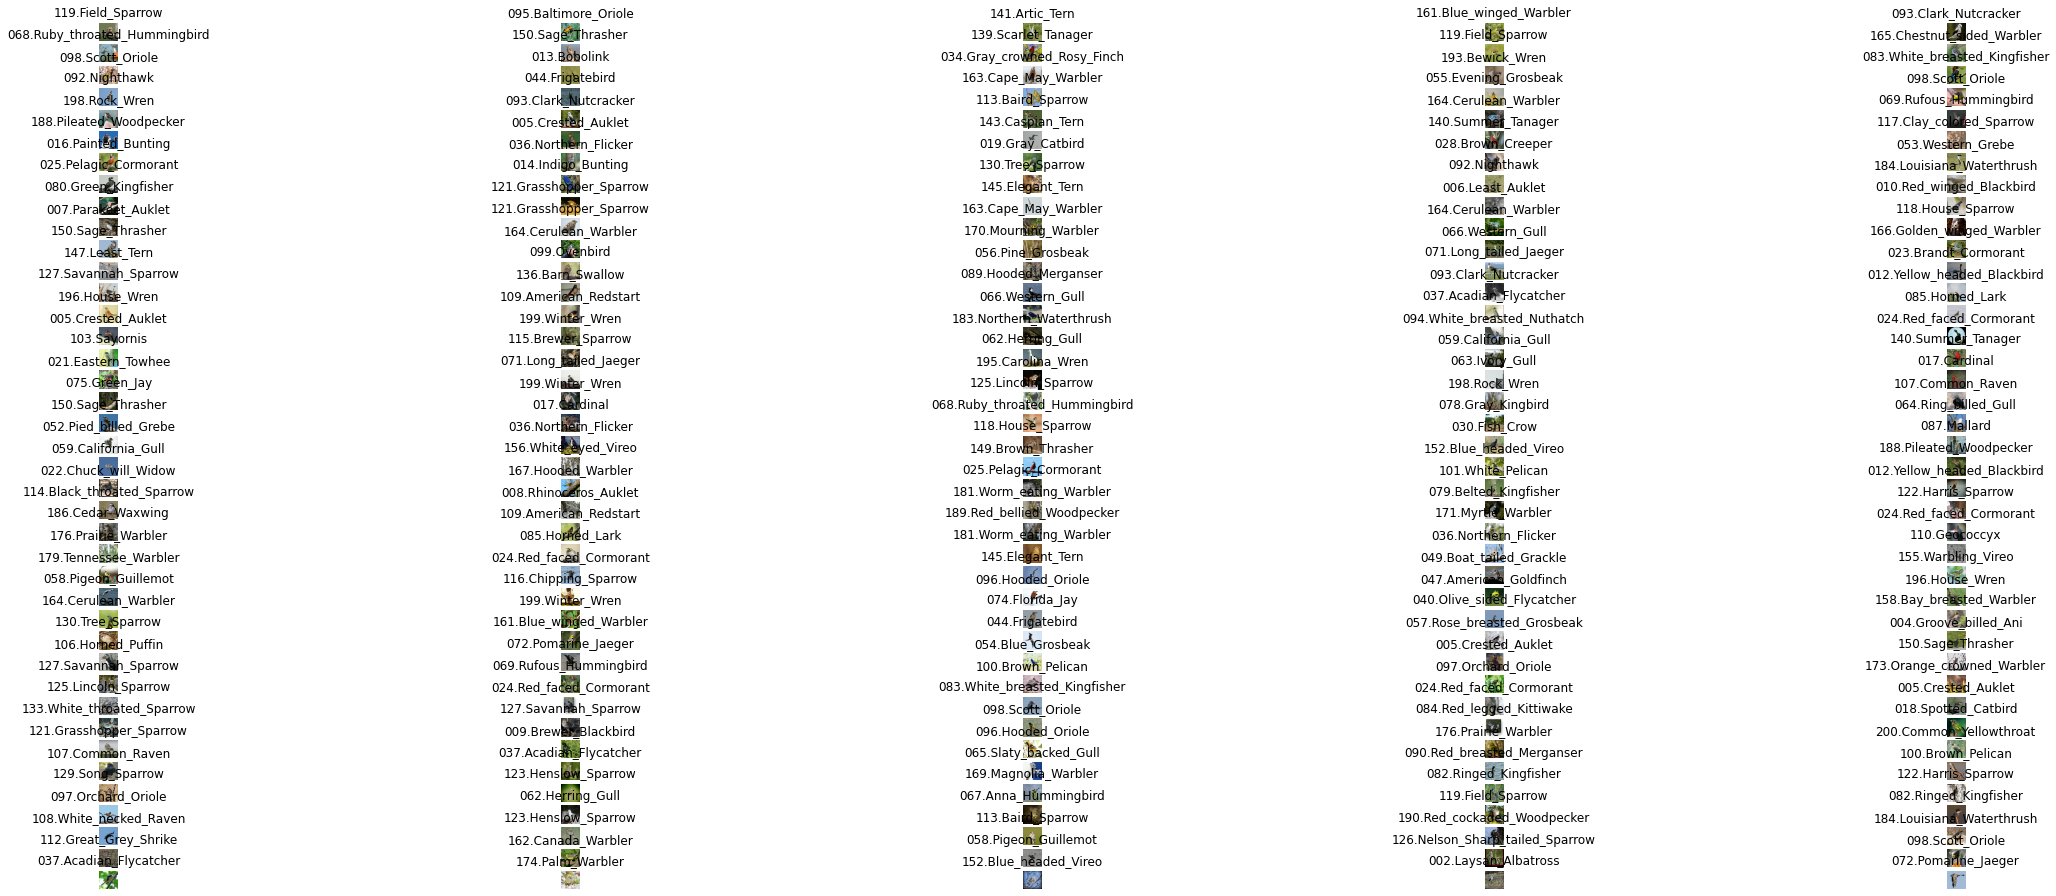

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 400))
for images, labels in train_ds.take(10):
  for i in range(200):
    ax = plt.subplot(1000, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

I tried to plot 5 sample for each class but tensor batches could be not contains all classes so that make a prblem

200


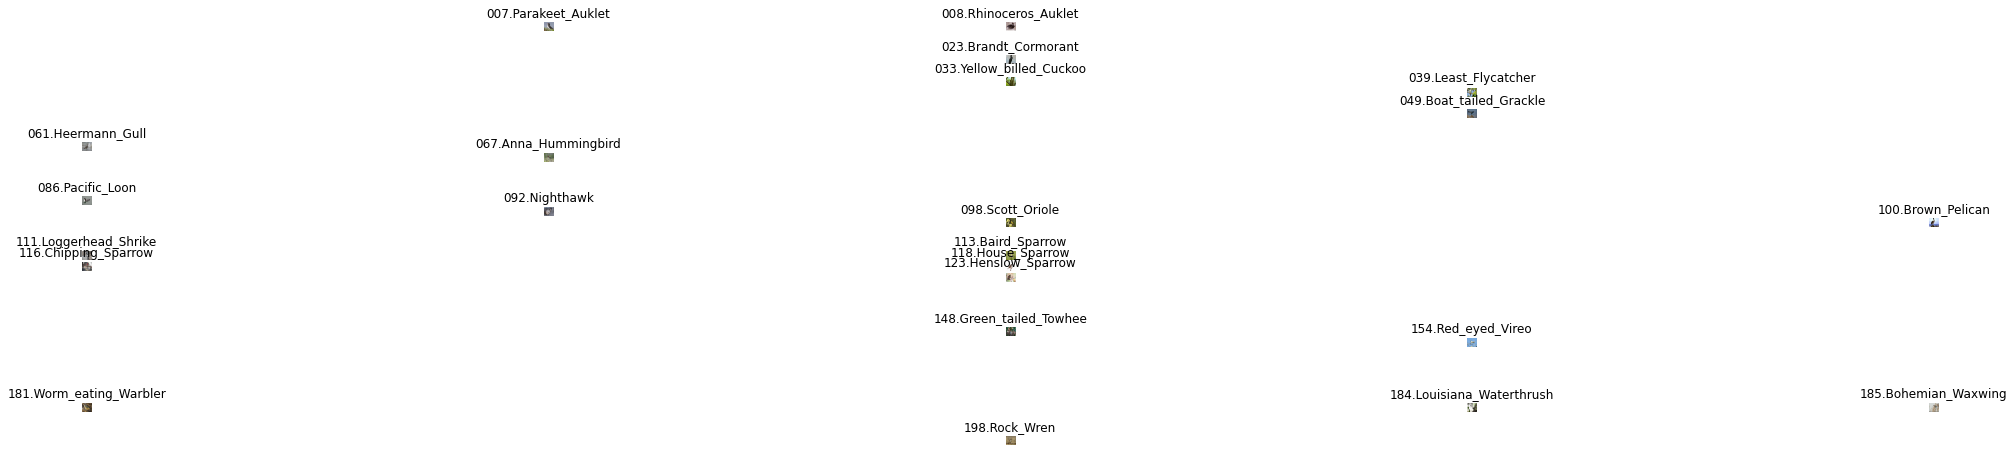

In [32]:
import random

num_batch_trainds = train_ds.cardinality().numpy()
random_batch = 200
print(random_batch)
plt.figure(figsize=(40, 40))
for i in range(len(class_names)):
   filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
   for image, label in filtered_ds.take(random_batch):
       ax = plt.subplot(200,5, i+1)
       plt.imshow(image[0].numpy().astype('uint8'))
       plt.title(class_names[label.numpy()[0]])
       plt.axis('off')

## Part 1. Perceptron 
For this section you will implement a fully connected neural network (multi-layer perceptron). To do this you will need to perform the following steps:
- Resize the images to be no larger than 32x32.
- Use the sequential model API in keras to build your network using dense layers (consider performance impacts of fully connected layers)
- You must decide an appropriate number of neurons and layers.
- Print a summary of your model configuration. 


When your classifier is working:
- Plot a loss curve for training and test data
- Plot an accuracy curve for training and test data
- Provide a brief discussion of your results 


In [6]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalizedtrain_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalizedtest_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in thestatement where they are used, or at least in the same block.https://github.com/tensorflow/tensorflow/issues/56089


In [7]:
AUTOTUNE = tf.data.AUTOTUNE
normalizedtrain_ds = normalizedtrain_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalizedtest_ds = normalizedtest_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
# Write your FC network code here
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(200,activation='softmax')
])

In [15]:
model.compile(
  optimizer=Adam(learning_rate=0.001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

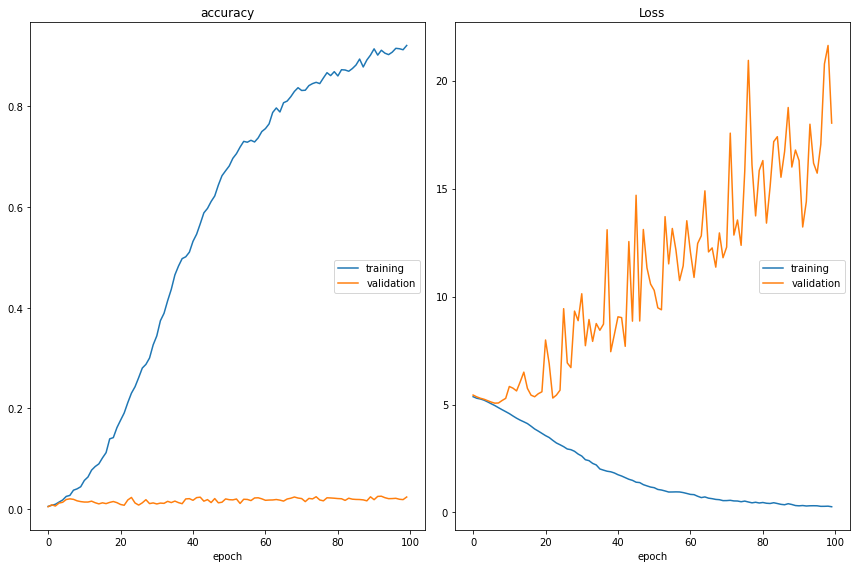

accuracy
	training         	 (min:    0.006, max:    0.921, cur:    0.921)
	validation       	 (min:    0.005, max:    0.026, cur:    0.024)
Loss
	training         	 (min:    0.267, max:    5.364, cur:    0.267)
	validation       	 (min:    5.064, max:   21.631, cur:   18.036)
24/24 - 1s - loss: 0.2669 - accuracy: 0.9211 - val_loss: 18.0355 - val_accuracy: 0.0242 - 1s/epoch - 59ms/step


In [16]:
model.fit(
  normalizedtrain_ds,
  validation_data=normalizedtest_ds,
  epochs=100,callbacks= [PlotLossesKeras()],verbose=2)

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

Provide your discussion here

Our task to build FC network with dense layers as our dataset is small and simple images

By flattening you'll loose all the spacial informations of the image, informations that can be really important. That's why convolutional networks could be better, they keep all those features.

Fully connnected networks can achieve high accuracy quickly on simple tasks but will never perform as good as a convolutional network on images.

## Part 2. ResNet-101 

For this section you will adapt the network for the current task using tranfer learning and fine-tuning. You will implement the following in your process:
- You should choose a suitable image size.
- Choose a suitable labelling scheme.
- Use the pretrained ResNet-101 network available in Keras.
- Remove the top fully connected layers. Include your own FC layers that match our dataset.
- Choose some layers to "freeze" and the remaining layers you will fine-tune with the new dataset.

### Step 1
You will use the above steps to train a ResNet-101 model using the Bird dataset
- Use transfer learning to train your first model by removing the FC layers, but leaving the other layers intact.
- Plot a loss curve for training and test data
- Plot an accuracy curve for training and test data

### Step 2
Now use the same steps as above, but this time unfreeze some convolutional layers and retrain the network. Again, plot your results.

### Step 3
Discuss the results of both methods from step 1 and step 2 while using plots and graphics to support your discussion.


In [4]:
from tensorflow.keras.applications.resnet import ResNet101

In [7]:
train_dsres = keras.utils.image_dataset_from_directory(
    directory=PATH/"traintest/train/",
    batch_size=256,
     seed=123,
    image_size=(32,32))
test_dsres = keras.utils.image_dataset_from_directory(
    directory=PATH/"traintest/test/",
     seed=123,
    batch_size=256,
    image_size=(32,32))

Found 5994 files belonging to 200 classes.
Found 5794 files belonging to 200 classes.


In [8]:
normalizedtrain_ds_res = train_dsres.map(lambda x, y: (normalization_layer(x), y))
normalizedtest_ds_res = test_dsres.map(lambda x, y: (normalization_layer(x), y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in thestatement where they are used, or at least in the same block.https://github.com/tensorflow/tensorflow/issues/56089


In [19]:
normalizedtrain_ds_res = normalizedtrain_ds_res.cache().prefetch(buffer_size=AUTOTUNE)
normalizedtest_ds_res = normalizedtest_ds_res.cache().prefetch(buffer_size=AUTOTUNE)

In [41]:
image_batchres, labels_batchres = next(iter(normalizedtrain_ds_res))
image_batchteres, labels_batchteres = next(iter(normalizedtest_ds_res))

In [9]:
#Write your ResNet-101 code here
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet101(include_top=False,
                   input_shape=(32, 32, 3),classes=200)
for layer in pretrained_model.layers:
        if "_conv" in layer.name and "block1" in layer.name and ("block2" in layer.name or "block3" in layer.name or "block4" in layer.name):
                layer.trainable = False
                
resnet_model.add(pretrained_model)

In [ ]:
for layer in pretrained_model.layers:
        if "_conv" in layer.name and "block1" in layer.name:
                print(layer.name)

In [10]:
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Activation('relu'))
resnet_model.add(Flatten())
resnet_model.add(Dense(200, activation='softmax'))

In [11]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 1, 1, 2048)        42658176  
                                                                 
 dense (Dense)               (None, 1, 1, 512)         1049088   
                                                                 
 activation (Activation)     (None, 1, 1, 512)         0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               102600    
                                                                 
Total params: 43,809,864
Trainable params: 43,704,520
Non-trainable params: 105,344
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import Adam

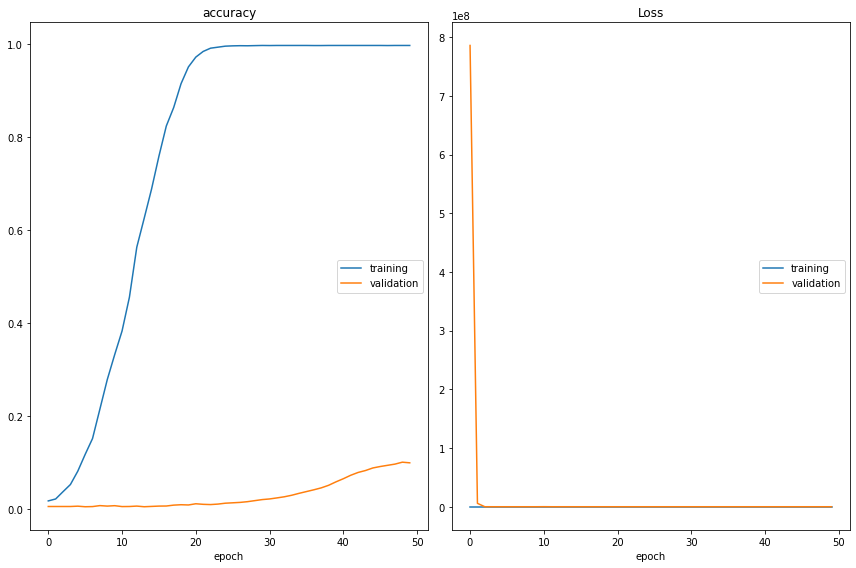

accuracy
	training         	 (min:    0.017, max:    0.996, cur:    0.996)
	validation       	 (min:    0.005, max:    0.100, cur:    0.099)
Loss
	training         	 (min:    0.021, max:    5.171, cur:    0.021)
	validation       	 (min:    5.372, max: 786047680.000, cur:    9.091)
24/24 [==============================] - 272s 11s/step - loss: 0.0212 - accuracy: 0.9963 - val_loss: 9.0909 - val_accuracy: 0.0991


In [21]:
resnet_model.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(normalizedtrain_ds_res, validation_data=(normalizedtest_ds_res), epochs=50, callbacks= [PlotLossesKeras()])

UNFreeze

In [26]:
resnet_model2 = Sequential()

pretrained_model2= tf.keras.applications.ResNet101(include_top=False,
                   input_shape=(32, 32, 3),classes=200)

for layer in pretrained_model2.layers:
        layer.trainable = False

for layer in pretrained_model2.layers:
        if "_conv" in layer.name and ("block2" in layer.name or "block3" in layer.name or "block4" in layer.name):
                layer.trainable = True


resnet_model2.add(pretrained_model2)

In [27]:
resnet_model2.add(Dense(512, activation='relu'))
resnet_model2.add(Flatten())
resnet_model2.add(Dense(200, activation='softmax'))

In [28]:
resnet_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 1, 1, 2048)        42658176  
                                                                 
 dense_4 (Dense)             (None, 1, 1, 512)         1049088   
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               102600    
                                                                 
Total params: 43,809,864
Trainable params: 18,858,184
Non-trainable params: 24,951,680
_________________________________________________________________


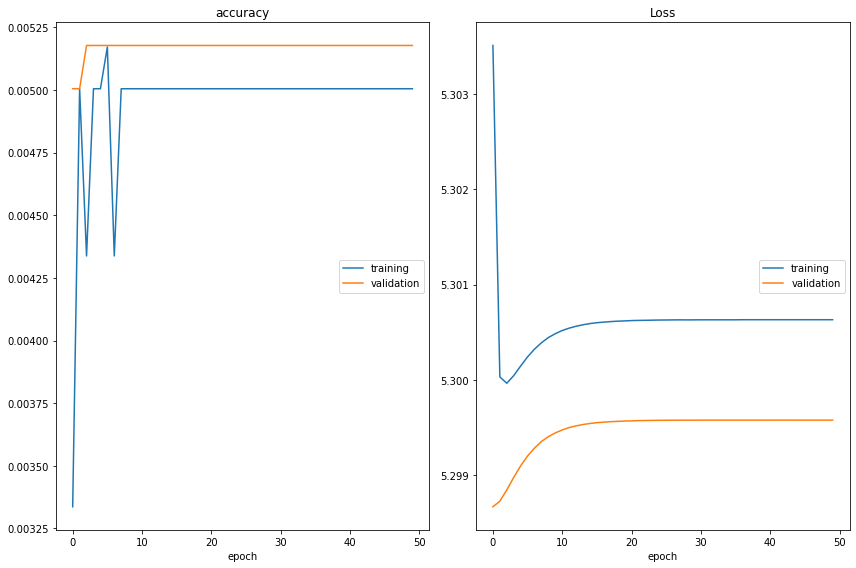

accuracy
	training         	 (min:    0.003, max:    0.005, cur:    0.005)
	validation       	 (min:    0.005, max:    0.005, cur:    0.005)
Loss
	training         	 (min:    5.300, max:    5.304, cur:    5.301)
	validation       	 (min:    5.299, max:    5.300, cur:    5.300)
24/24 [==============================] - 231s 10s/step - loss: 5.3006 - accuracy: 0.0050 - val_loss: 5.2996 - val_accuracy: 0.0052


In [30]:
resnet_model2.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model2.fit(normalizedtrain_ds_res, validation_data=(normalizedtest_ds_res), epochs=50, callbacks= [PlotLossesKeras()])

First model we freeze the FC network.

we are Removing the FC network and adding dense layers instead.

the training accuracy is accepetable the model perform well during training and the validation accuracy increase constantly with the epochs it could be much better if we increase ephochs the models is good so far.

accuracy training         	 min:    0.017, max:    0.996    96.6%

accuracy validation       	 min:    0.005, max:    0.100    10.0% 

with 50 epoch.





Secoend model we unfreeze Some layers.

The model loss the advantage of learning during the training and validation phases.

accuracy training         	 min:    0.003, max:    0.005  

accuracy validation       	 min:    0.005, max:    0.005

with 50 epoch.

dataset is very small, so our most likely overfitting, decreasing learning rate by one of the values (0.001, 0.0001, 0.00001) could solve that(takes too long in training) [require resources]. 

image augmentations (at least the default ones, like random crop and flip) could be helpful in feeding the layers with more samples for saturation.

## Part 3. Visualization 

For this section you will visualize the filters learned byyour ResNet-101 network and use t-SNE to observe clusters that were learned by your model.
- Make sure to provide the graphic results for your visualizations
- Provide an interpretation of the results

## Bonus 
Visualize the activation maps produced by your network and discuss the results using an image from the test test and another image of your choice.

In [31]:
from matplotlib import pyplot

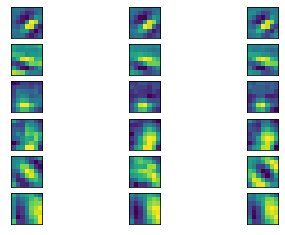

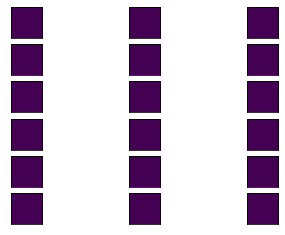

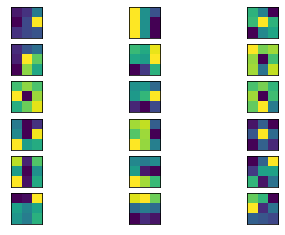

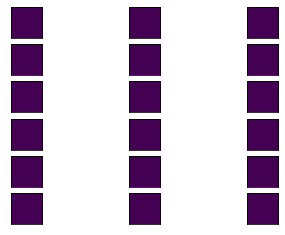

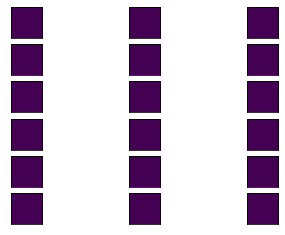

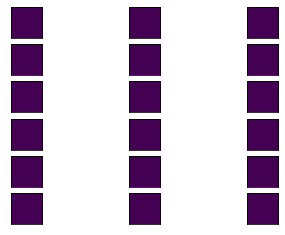

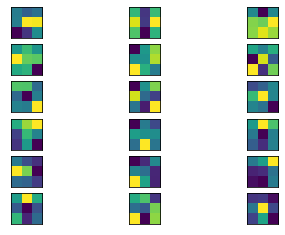

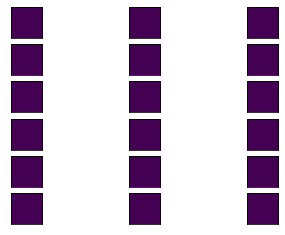

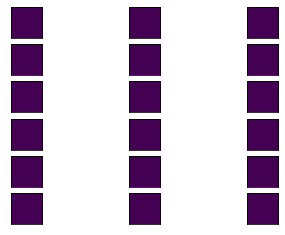

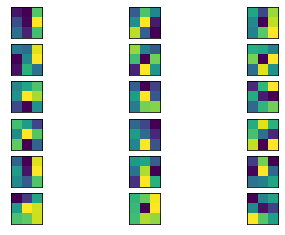

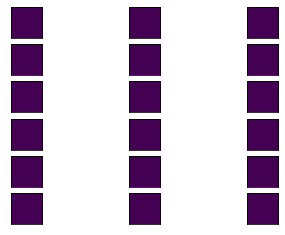

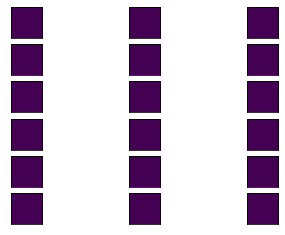

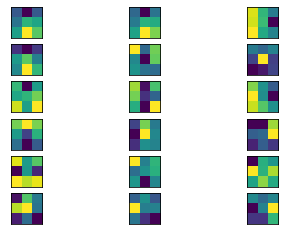

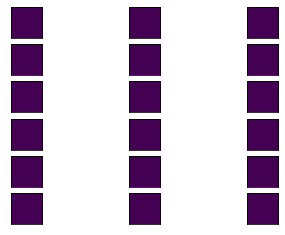

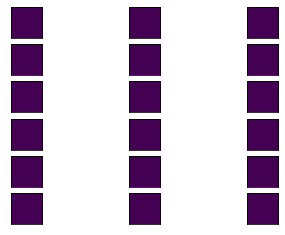

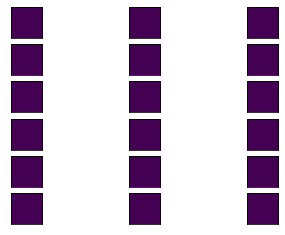

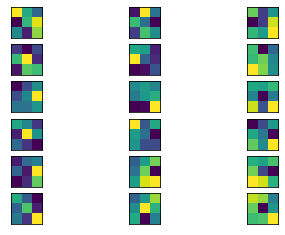

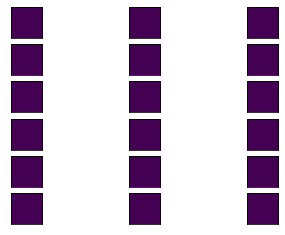

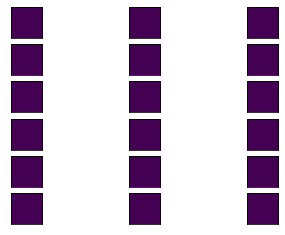

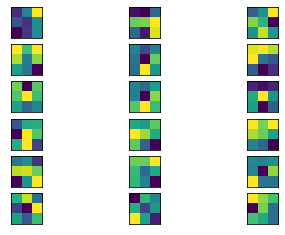

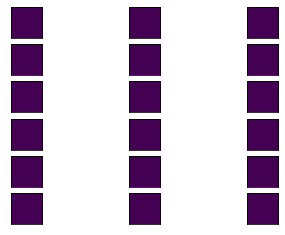

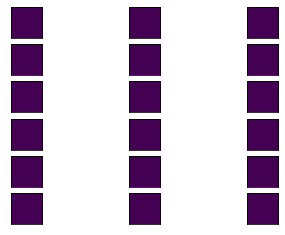

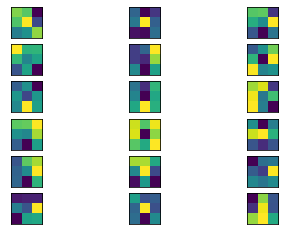

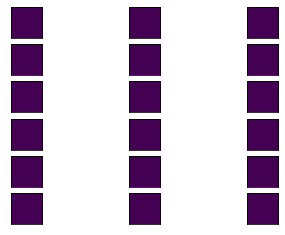

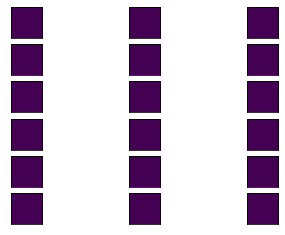

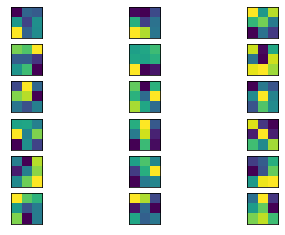

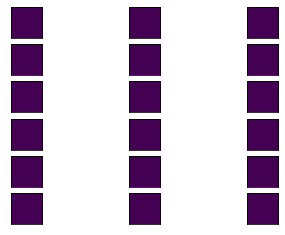

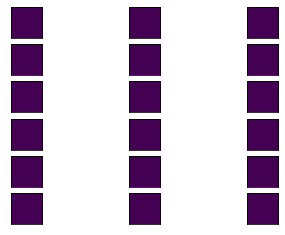

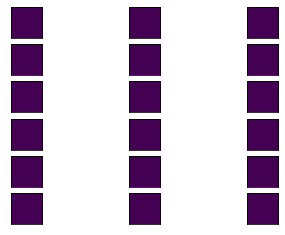

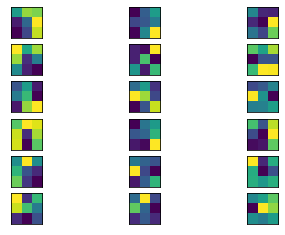

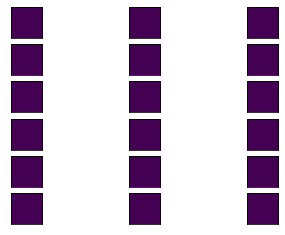

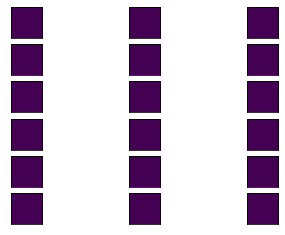

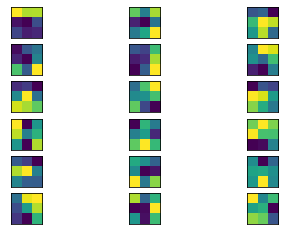

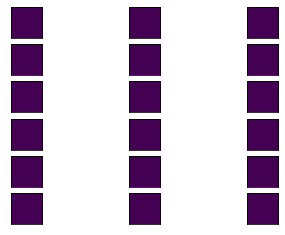

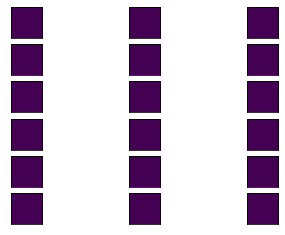

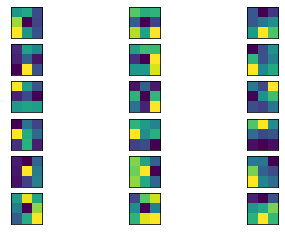

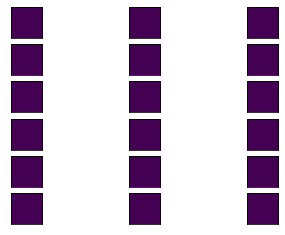

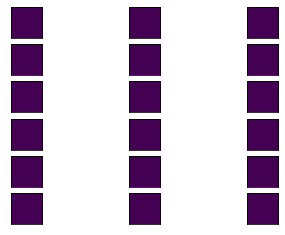

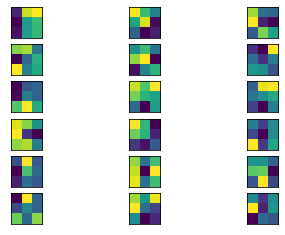

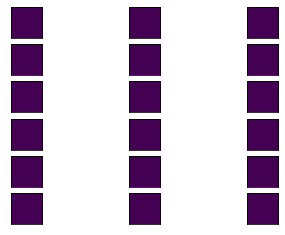

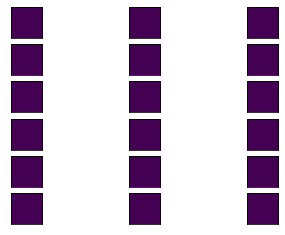

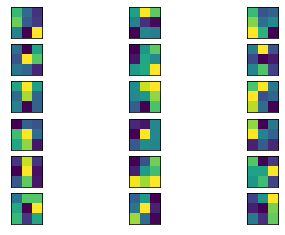

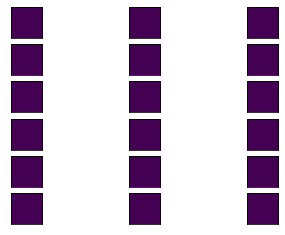

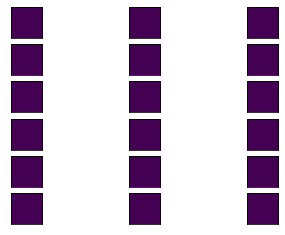

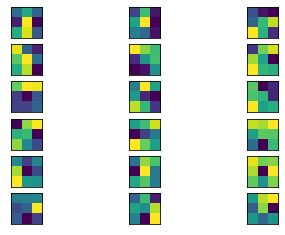

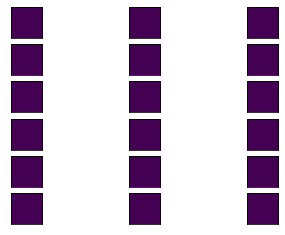

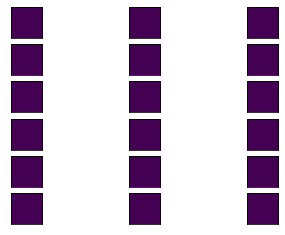

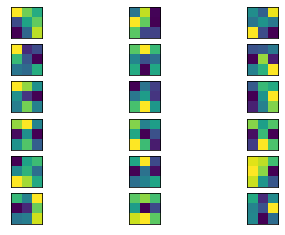

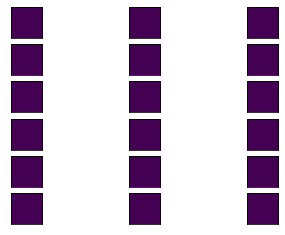

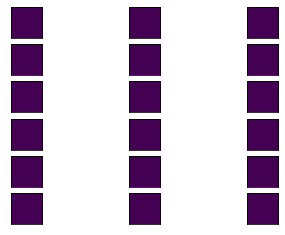

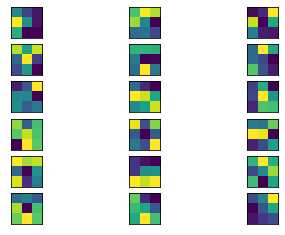

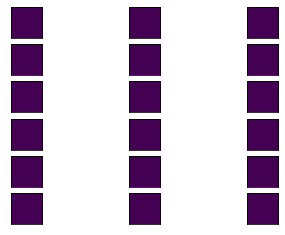

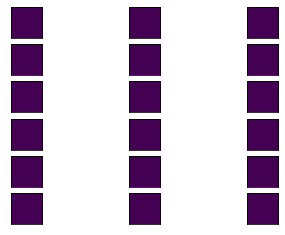

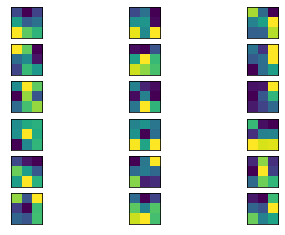

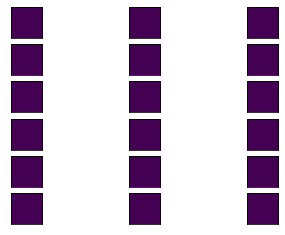

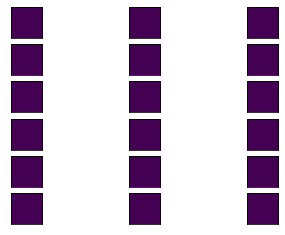

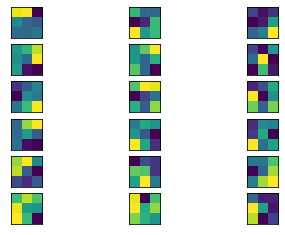

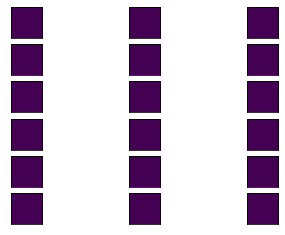

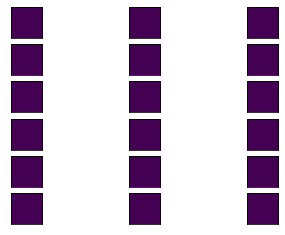

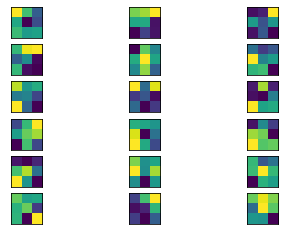

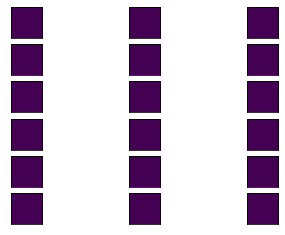

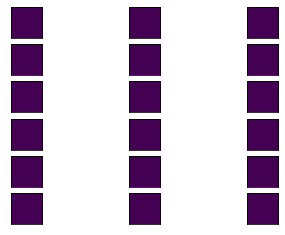

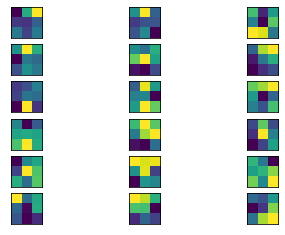

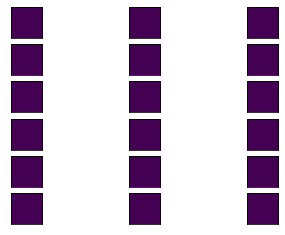

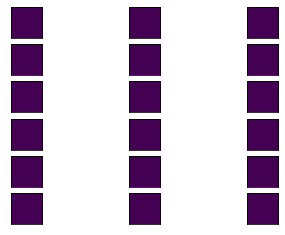

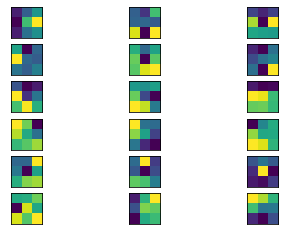

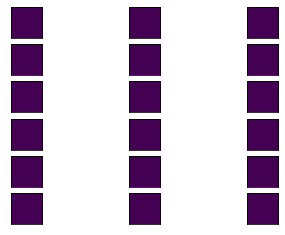

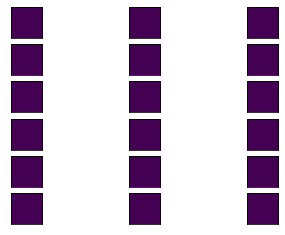

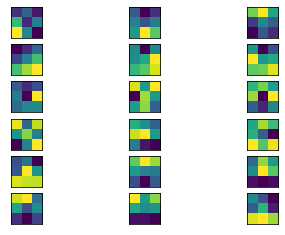

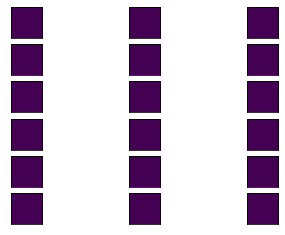

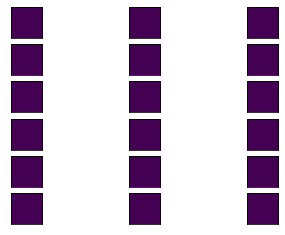

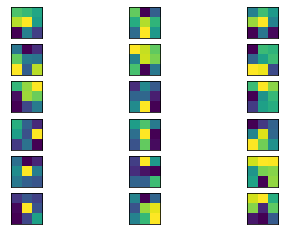

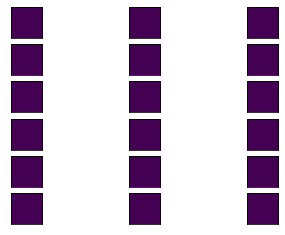

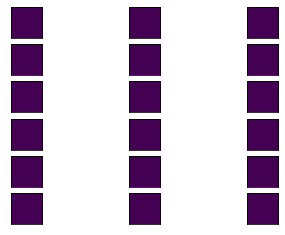

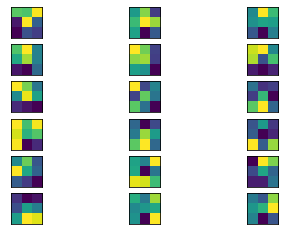

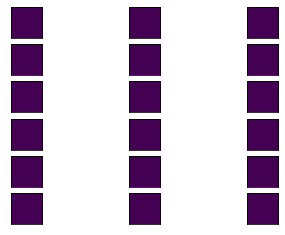

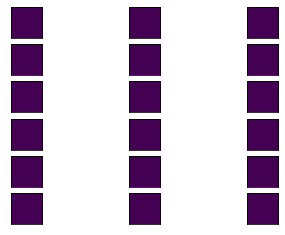

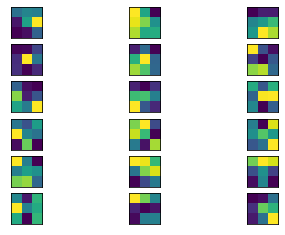

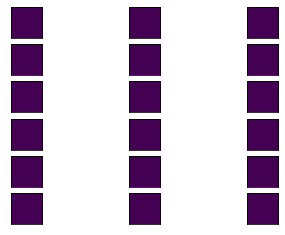

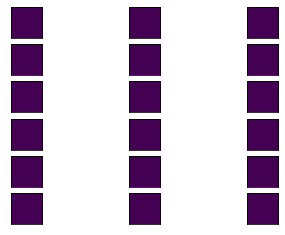

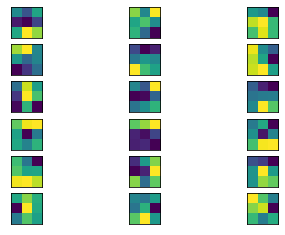

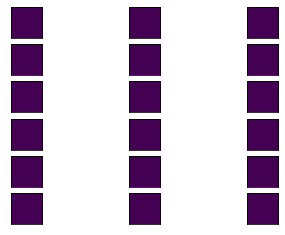

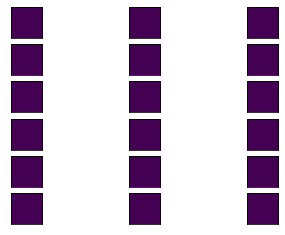

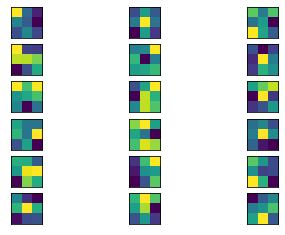

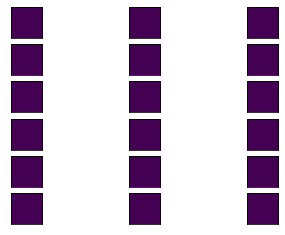

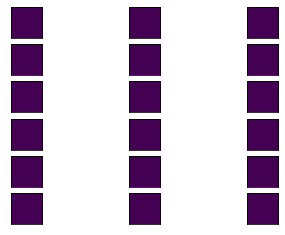

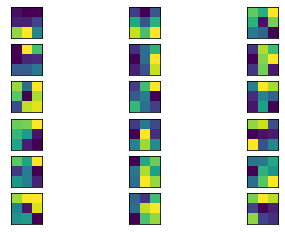

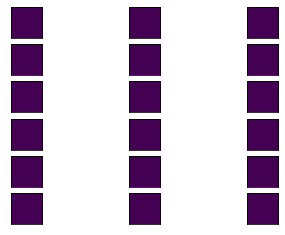

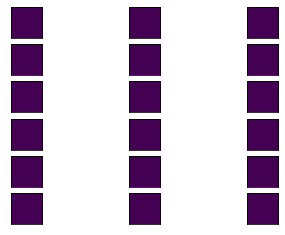

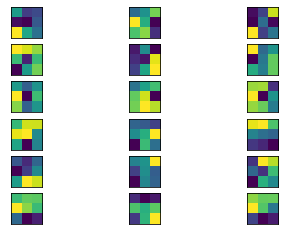

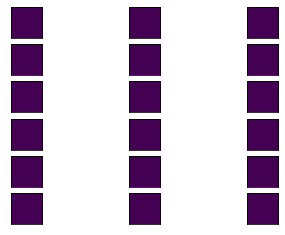

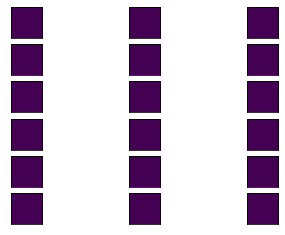

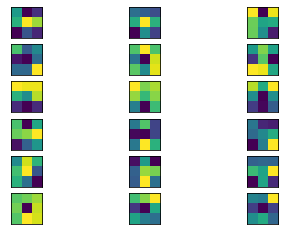

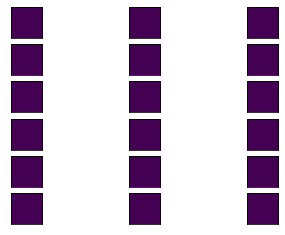

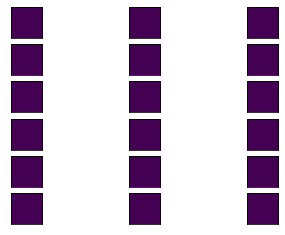

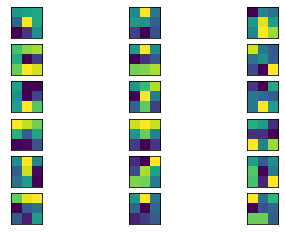

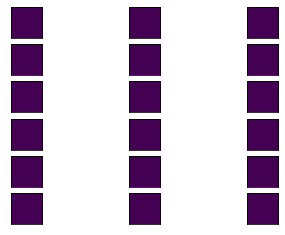

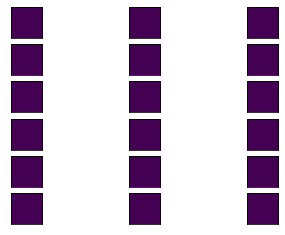

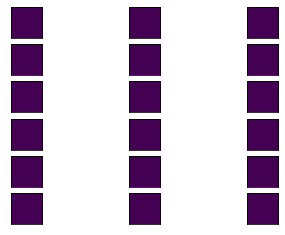

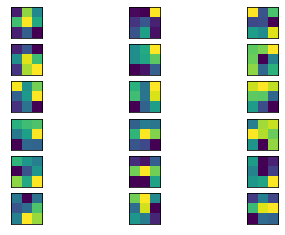

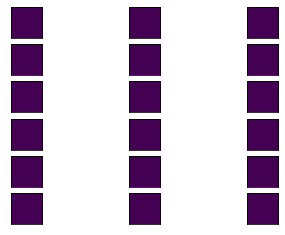

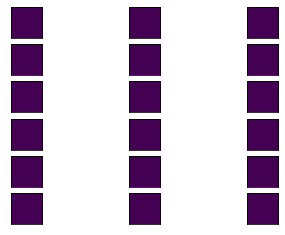

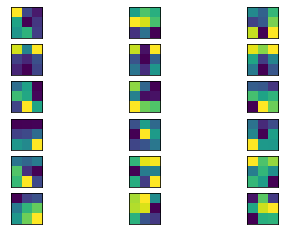

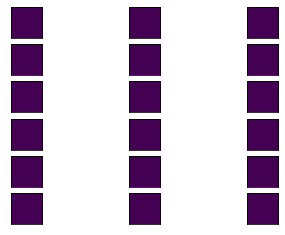

In [32]:
# Write your visualization code here.
for l in resnet_model2.layers[0].layers:
    if "_conv" in l.name:
        filters=l.get_weights()[0]
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)
        # plot first few filters
        n_filters, ix = 6, 1
        for i in range(n_filters):
            # get the filter
            f = filters[:, :, :, i]
            # plot each channel separately
            for j in range(3):
                # specify subplot and turn of axis
                ax = pyplot.subplot(n_filters, 3, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                pyplot.imshow(f[:, :, j])
                ix += 1
        pyplot.show()

In [33]:
from tensorflow.keras.models import Model

In [86]:
resnet_model.layers[0].layers[-1].output

<KerasTensor: shape=(None, 1, 1, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [89]:
featuremodel=Model(inputs=resnet_model.layers[0].input,outputs=resnet_model.layers[0].layers[-1].output)
modeloutput=featuremodel.predict(normalizedtest_ds_res)
modeloutput = modeloutput.reshape(-1,modeloutput.shape[-1])

23/23 [==============================] - 34s 946ms/step


In [ ]:
# featuremodel=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer("flatten").output)
# modeloutput=featuremodel(normalizedtest_ds_res)

In [47]:
from sklearn.manifold import TSNE
from matplotlib.pyplot import imshow
from PIL import Image

In [95]:
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(modeloutput)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5794 samples in 0.071s...
[t-SNE] Computed neighbors for 5794 samples in 2.499s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5794
[t-SNE] Computed conditional probabilities for sample 2000 / 5794
[t-SNE] Computed conditional probabilities for sample 3000 / 5794
[t-SNE] Computed conditional probabilities for sample 4000 / 5794
[t-SNE] Computed conditional probabilities for sample 5000 / 5794
[t-SNE] Computed conditional probabilities for sample 5794 / 5794
[t-SNE] Mean sigma: 5.729845
[t-SNE] Computed conditional probabilities in 0.372s
[t-SNE] Iteration 50: error = 89.8863754, gradient norm = 0.0023849 (50 iterations in 4.241s)
[t-SNE] Iteration 100: error = 85.1065979, gradient norm = 0.0031216 (50 iterations in 3.014s)
[t-SNE] Iteration 150: error = 84.8859253, gradient norm = 0.0000488 (50 iterations in 1.921s)
[t-SNE] Iteration 200: error = 84.8838043, gradient norm = 0.0000437 (50 iterations in 2.398s)
[t

Discuss here.

In [72]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [96]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty)) 

In [ ]:
width = 1000
height = 500
max_dim = 100

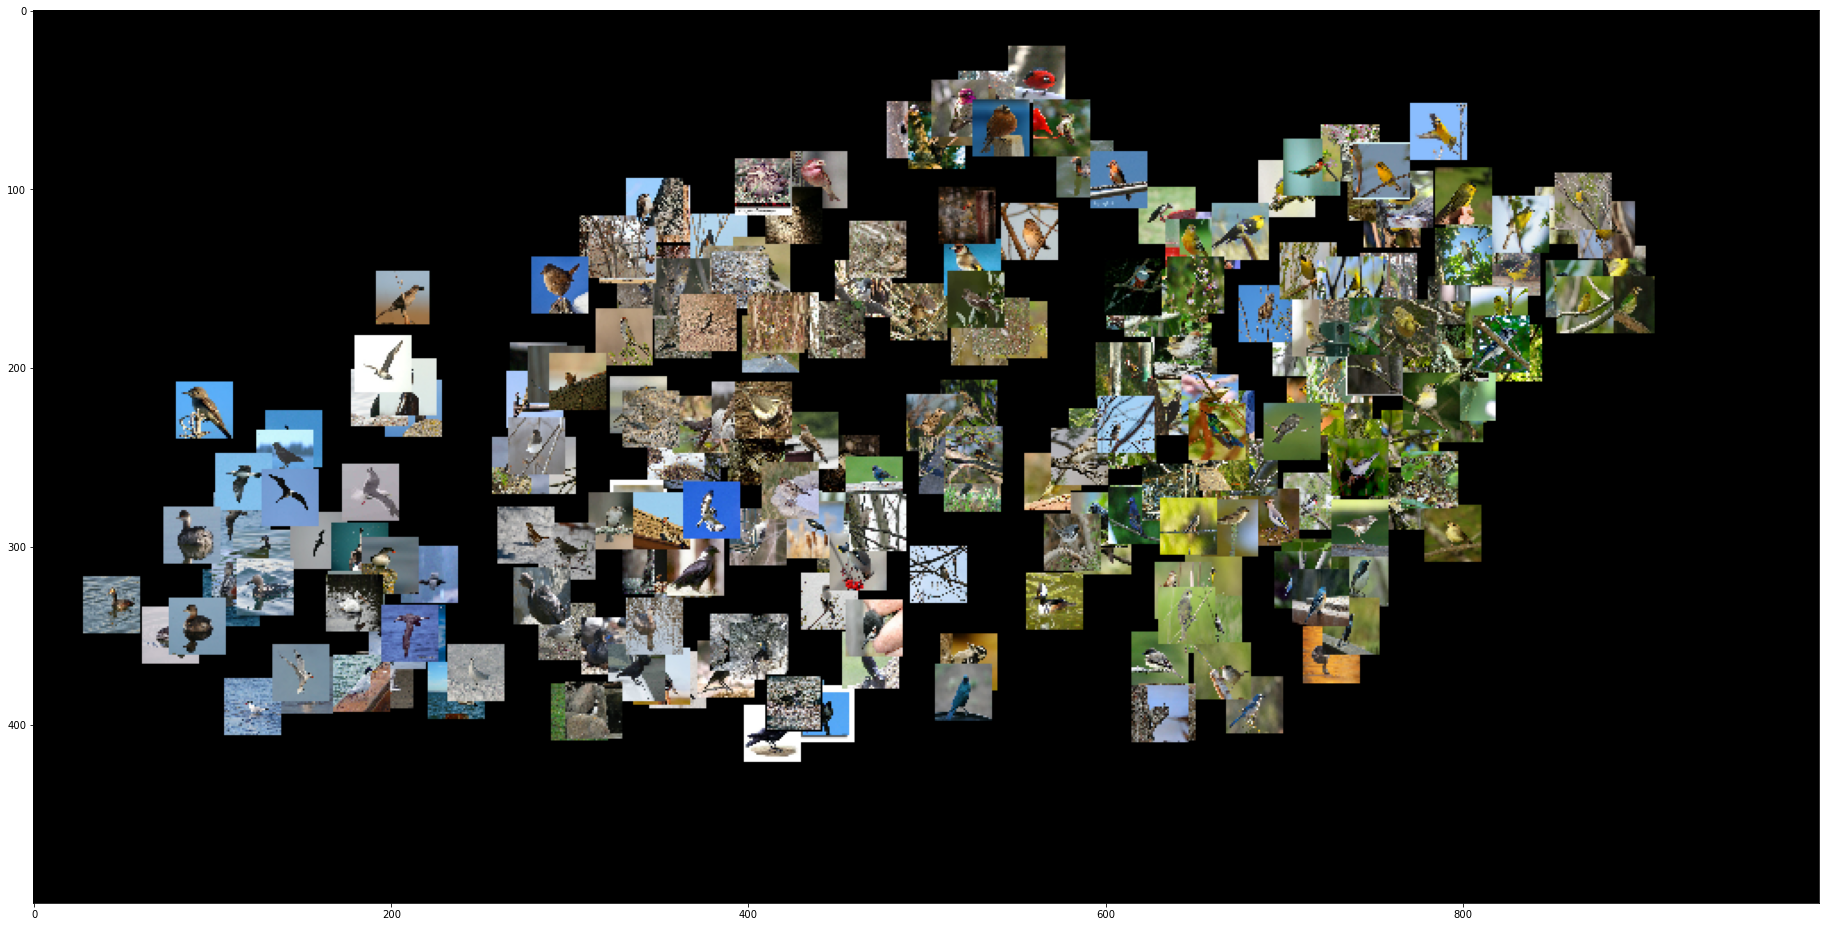

In [104]:
imgsp,lbimg=next(iter(normalizedtest_ds_res)) #batch of 256 img
full_image = Image.new('RGB', (width, height))
plt.figure(figsize=(32, 32))
for idx, x in enumerate(imgsp):
    tile = Image.fromarray(np.uint8(x * 255))
    rs = max(1, tile.width / max_dim, tile.height / max_dim)
    tile = tile.resize((int(tile.width / rs),
                        int(tile.height / rs)),
                       Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]),
                            int((height-max_dim) * ty[idx])))
plt.imshow(full_image)